<a href="https://colab.research.google.com/github/BOrtizL/Proyecto-7-DataScience/blob/main/4_1_UDD_Proyecto_M7_Modelo_de_Regresi%C3%B3n_Log%C3%ADstica_ac_BarbaraOrtiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este notebook aplicaremos Machine Learning, donde se aplicará Refresión logística para los datos de alta confianza.

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pickle
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


**Cargar los datos de alta confianza transformados**

In [43]:
# Ruta del archivo original en Google Drive
ruta_archivo_drive = "/content/drive/My Drive/Proyecto 7/raw/df_concatenado_alta_confianza.pkl"

# Cargar el DataFrame desde el archivo
with open(ruta_archivo_drive, 'rb') as f:
    df_concatenado_alta_confianza = pickle.load(f)

In [44]:
# Paso 1: Separar las características y la etiqueta
X = df_concatenado_alta_confianza.drop('gender', axis=1)
y = df_concatenado_alta_confianza['gender']

**Observación:**
La variable objetivo será predecir que genero ganará un oscar.

In [45]:
# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



A continuación, aplicaremos **PCA** sólo en el conjunto de entrenamiento y utilizará los parámetros aprendidos para transformar el conjunto de prueba.

Los datos se dividen en conjuntos de entrenamiento y prueba antes de aplicar PCA para evitar el data leakage.

Es recomendable escalar los datos antes de aplicar PCA para asegurar que todas las características contribuyan equitativamente.
Este enfoque garantiza que el modelo se entrene y evalúe de manera adecuada y que los resultados sean representativos del rendimiento real del modelo en datos no vistos.







In [46]:
# Paso 3: Preprocesamiento - Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Aplicar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(X_train_scaled)


PCA()

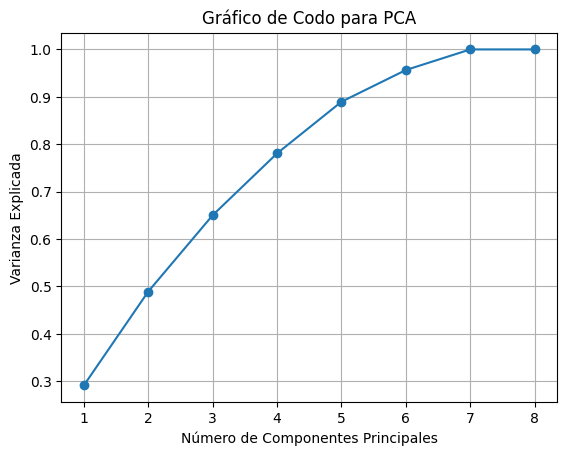

In [47]:
# Paso 4: Varianza explicada por cada componente
explained_variance_ratio_ac = pca.explained_variance_ratio_

# Calcular el número de componentes principales
n_components = len(explained_variance_ratio_ac)

# Crear un gráfico de codo
cumulative_variance = np.cumsum(explained_variance_ratio_ac)
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.title('Gráfico de Codo para PCA')
plt.grid(True)
plt.show()

**El gráfico de codo** es una herramienta útil para determinar el número óptimo de componentes principales a retener en un análisis.
Según la gráfica, el punto en el que la curva forma un codo es en el punto **7**, lo que indica que agregar más componentes principales ya no proporciona una ganancia significativa en términos de varianza explicada.
Como conslusión, **la cantidad óptima es 7**

In [48]:
# Análisis de componentes principales
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [2.91129858e-01 1.98023447e-01 1.60996976e-01 1.30505212e-01
 1.08973180e-01 6.69444242e-02 4.34269023e-02 1.08230647e-33]



Para cada componente principal, el valor indicado es la proporción de la varianza total de los datos que es explicada por ese componente en particular.

Para este caso, los valores representan la varianza explicada por cada uno de los primeros 7 componentes principales, en orden descendente de importancia.

Esto es útil para entender cuánta información de los datos originales está capturada por cada componente principal. En general, se prefiere retener los componentes principales que explican la mayor parte de la varianza en los datos, mientras se reduce la dimensionalidad

In [49]:
# Paso 4: Aplicar PCA en el conjunto de entrenamiento
pca = PCA(n_components=7)  # Número óptimo de componentes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [50]:
# Paso 5: Entrenar el modelo con los datos transformados por PCA
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Paso 6: Evaluar el modelo
y_pred = model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, y_pred))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

[[3 0]
 [0 2]]


**Observación:**
El modelo de Regresión Logística tiene una precisión del 100%. Esto significa que el modelo tiene un excelente resultado de precisión.

A continuaación está la interpretación de las métricas:

- Precision: Ambas clases tienen una precisión de 1.00, lo que significa que todas las predicciones para ambas clases son correctas.

- Recall: Igualmente, ambas clases tienen un recall de 1.00, lo que indica que el modelo identificó correctamente todas las instancias de ambas clases.

- F1-score: Para ambas clases, el F1-score es 1.00, lo que indica un equilibrio perfecto entre precision y recall.

- Accuracy: La precisión global del modelo es del 100%, lo que significa que todas las predicciones son correctas.

Esto sugiere que el modelo está prediciendo perfectamente en este conjunto de datos. La matriz de confusión también debería mostrar que todas las predicciones son correctas.


La matriz de confusión que proporcionaste confirma que el modelo predijo perfectamente en este conjunto de datos:

Para la Clase 1 (1), el modelo hizo 3 predicciones correctas.
Para la Clase 2 (2), el modelo también hizo 2 predicciones correctas.

No hay falsos positivos ni falsos negativos.